#Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')

Saving Bank_Transaction_Fraud_Detection.csv to Bank_Transaction_Fraud_Detection.csv


In [3]:
print(df.head())
print(df.info())

                            Customer_ID        Customer_Name  Gender  Age  \
0  d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   60   
1  7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   51   
2  3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   20   
3  7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   57   
4  3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   43   

         State                City                Bank_Branch Account_Type  \
0       Kerala  Thiruvananthapuram  Thiruvananthapuram Branch      Savings   
1  Maharashtra              Nashik              Nashik Branch     Business   
2        Bihar           Bhagalpur           Bhagalpur Branch      Savings   
3   Tamil Nadu             Chennai             Chennai Branch     Business   
4       Punjab            Amritsar            Amritsar Branch      Savings   

                         Transaction_ID Transaction_Date  ...  \
0  

# Check for Missing Values

In [4]:
print(df.isna().sum())

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64


# Check for Duplicate Rows

In [5]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# Univariate Analysis

## Customer_ID

In [6]:
len(df['Customer_ID'].unique())

200000

All rows in the dataset have unique Customer_ID

## Customer_Name

In [7]:
len(df['Customer_Name'].unique())

142699

In [8]:
df['Customer_Name'].value_counts()

,count
Customer_Name,
Aahana Kala,8
Madhav Kala,7
Jonathan Dara,7
Lila Dutt,7
Krishna Nori,7
...,...
Amara Zacharia,1
Nachiket Purohit,1
Leena Mand,1


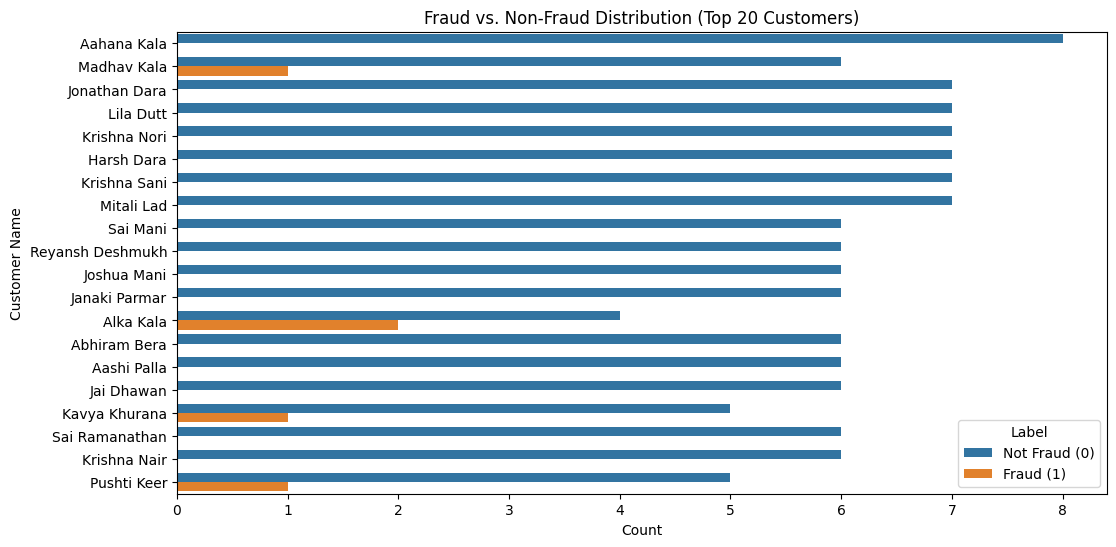

In [9]:
# Get top 20 customer names
top20_names = df['Customer_Name'].value_counts().head(20).index
df_top20 = df[df['Customer_Name'].isin(top20_names)]

# Plot class distribution for each name
plt.figure(figsize=(12,6))
sns.countplot(data=df_top20, y="Customer_Name", hue="Is_Fraud", order=top20_names)
plt.title("Fraud vs. Non-Fraud Distribution (Top 20 Customers)")
plt.xlabel("Count")
plt.ylabel("Customer Name")
plt.legend(title="Label", labels=["Not Fraud (0)", "Fraud (1)"])
plt.show()

No observed relationship between Customer_Name and Is_Fraud.

## Gender

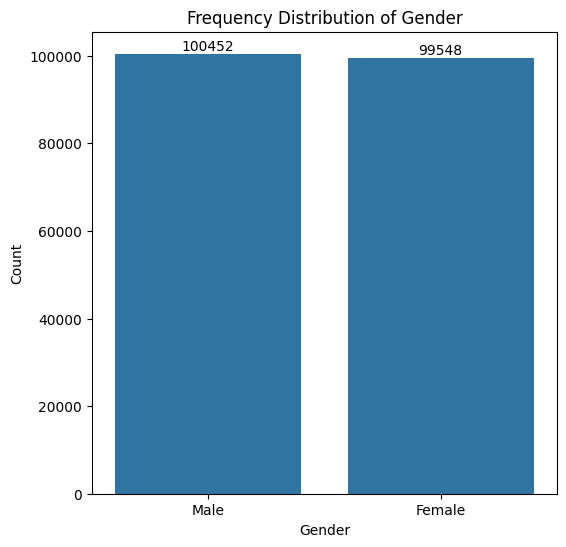

In [10]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])
plt.title("Frequency Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Age

In [11]:
df['Age'].describe()

,Age
count,200000.000000
mean,44.015110
std,15.288774
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,70.000000


<Axes: >

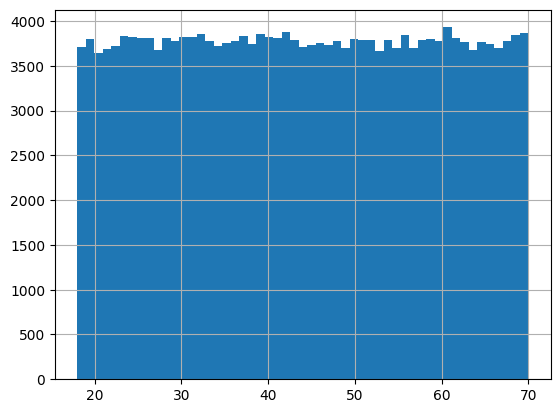

In [12]:
df['Age'].hist(bins=53) #set bins to 70-18+1 to view distribution of each age

## State

In [13]:
print(df['State'].describe())

count       200000
unique          34
top       Nagaland
freq          6031
Name: State, dtype: object


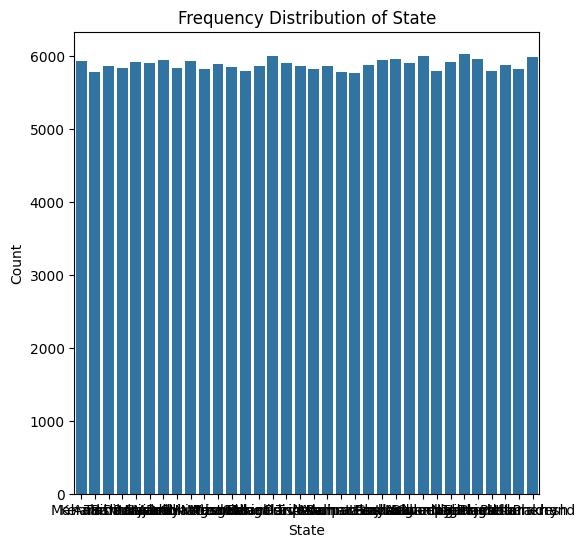

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='State')
plt.title("Frequency Distribution of State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

## City

In [15]:
df['City'].nunique()

145

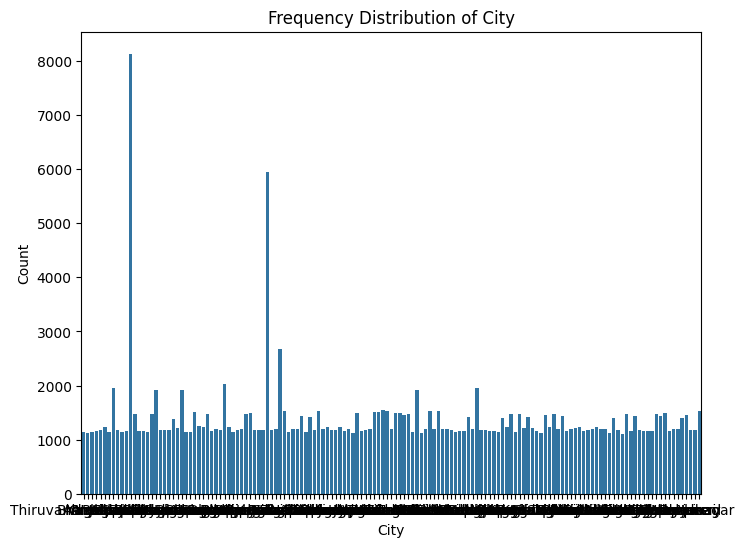

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='City')
plt.title("Frequency Distribution of City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

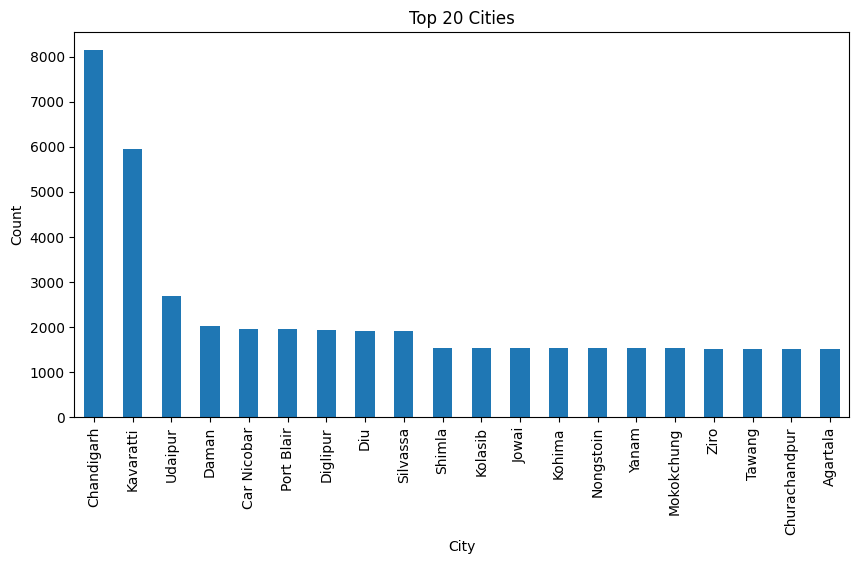

In [17]:
df['City'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title("Top 20 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

Consider encoding into top 3 and others

## Bank_Branch

In [18]:
print(df['Bank_Branch'].describe())

count                200000
unique                  145
top       Chandigarh Branch
freq                   8135
Name: Bank_Branch, dtype: object


In [19]:
branch_per_city = df.groupby('City')['Bank_Branch'].nunique()
print(branch_per_city)

city_per_branch = df.groupby('Bank_Branch')['City'].nunique()
print(city_per_branch)

City
Agartala      1
Agra          1
Ahmedabad     1
Aizawl        1
Ajmer         1
             ..
Warangal      1
West Delhi    1
Wokha         1
Yanam         1
Ziro          1
Name: Bank_Branch, Length: 145, dtype: int64
Bank_Branch
Agartala Branch      1
Agra Branch          1
Ahmedabad Branch     1
Aizawl Branch        1
Ajmer Branch         1
                    ..
Warangal Branch      1
West Delhi Branch    1
Wokha Branch         1
Yanam Branch         1
Ziro Branch          1
Name: City, Length: 145, dtype: int64


In [20]:
matches = df['Bank_Branch'] == (df['City'] + " Branch")
print(matches.value_counts())

True    200000
Name: count, dtype: int64


Branch and City has 1:1 mapping, where Bank_Branch == City + ' Branch'. We can just keep 1 of them as a feature.

## Account_Type

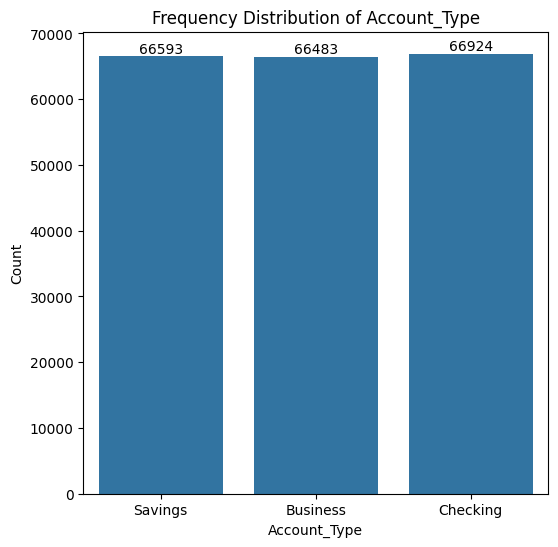

In [21]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x='Account_Type')
ax.bar_label(ax.containers[0])
plt.title("Frequency Distribution of Account_Type")
plt.xlabel("Account_Type")
plt.ylabel("Count")
plt.show()

##Transaction_ID

In [22]:
len(df['Transaction_ID'].unique())

200000

##Transaction_Date

In [23]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], dayfirst=True, errors='coerce')
df['day_name'] = df['Transaction_Date'].dt.day_name()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
print(df['day_name'].value_counts().reindex(weekday_order))

# Day of month (1–31)
df['day_of_month'] = df['Transaction_Date'].dt.day

# Day of week (0=Monday, 6=Sunday)
df['day_of_week'] = df['Transaction_Date'].dt.weekday

day_name
Monday       26557
Tuesday      26435
Wednesday    33340
Thursday     33581
Friday       26492
Saturday     26884
Sunday       26711
Name: count, dtype: int64


##Transaction_Time

In [24]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Convert to minutes after midnight
df['minutes_after_midnight'] = df['Transaction_Time'].apply(lambda x: x.hour*60 + x.minute)



##Transaction_Amount

In [25]:
df['Transaction_Amount'].describe()

,Transaction_Amount
count,200000.000000
mean,49538.015554
std,28551.874004
min,10.290000
25%,24851.345000
50%,49502.440000
75%,74314.625000
max,98999.980000


<Axes: >

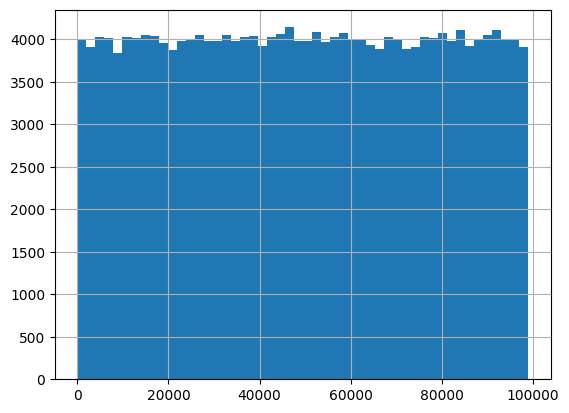

In [26]:
df['Transaction_Amount'].hist(bins=50)

In [27]:
# Binning
bins = [0, 500, 5000, 50000, df['Transaction_Amount'].max()]
labels = ['Small','Medium','Large','Very Large']

df['amount_bin'] = pd.cut(df['Transaction_Amount'], bins=bins, labels=labels)

print(df['amount_bin'].value_counts())


amount_bin
Very Large    98979
Large         90980
Medium         9036
Small          1005
Name: count, dtype: int64


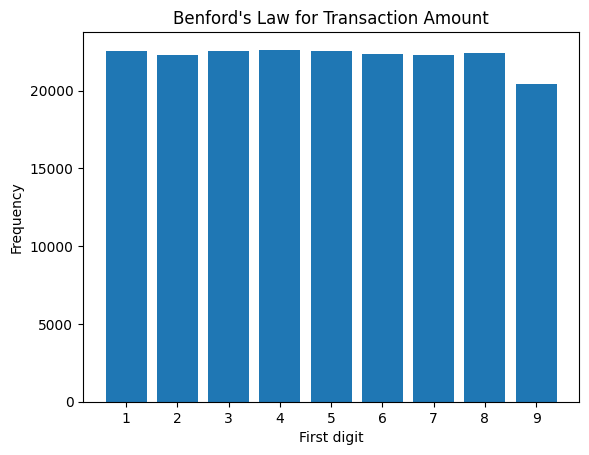

In [28]:
# Benford's Law
df['first_digit'] = df['Transaction_Amount'].astype(str).str[0].astype(int)

counts = df['first_digit'].value_counts().sort_index()

plt.bar(counts.index, counts.values)
plt.xlabel('First digit')
plt.ylabel('Frequency')
plt.title("Benford's Law for Transaction Amount")
plt.xticks(range(1, 10))
plt.show()


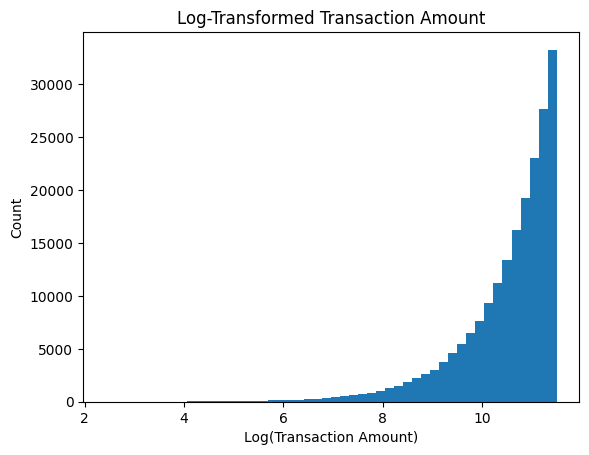

In [29]:
# Log Transformation
df['log_amount'] = np.log1p(df['Transaction_Amount'])

plt.hist(df['log_amount'], bins=50)
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Count')
plt.title('Log-Transformed Transaction Amount')
plt.show()


##Merchant_ID

In [30]:
len(df['Merchant_ID'].unique())

200000

##Transaction_Type

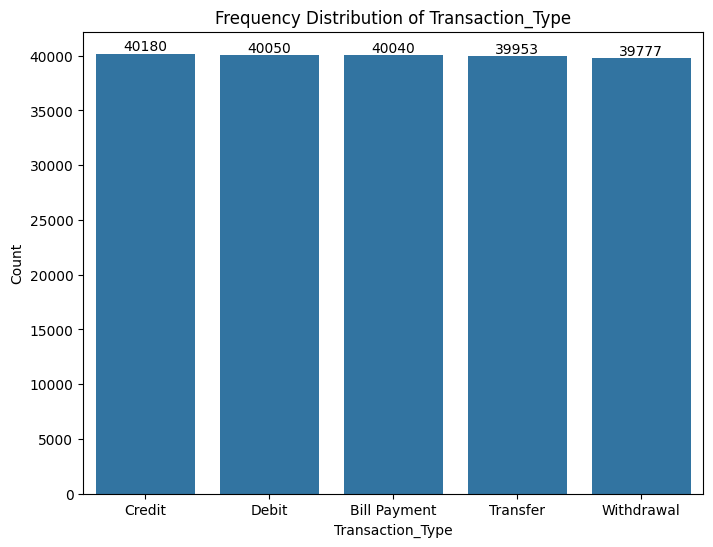

In [31]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Transaction_Type', order=df['Transaction_Type'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Frequency Distribution of Transaction_Type")
plt.xlabel("Transaction_Type")
plt.ylabel("Count")
plt.show()


##Merchant_Category

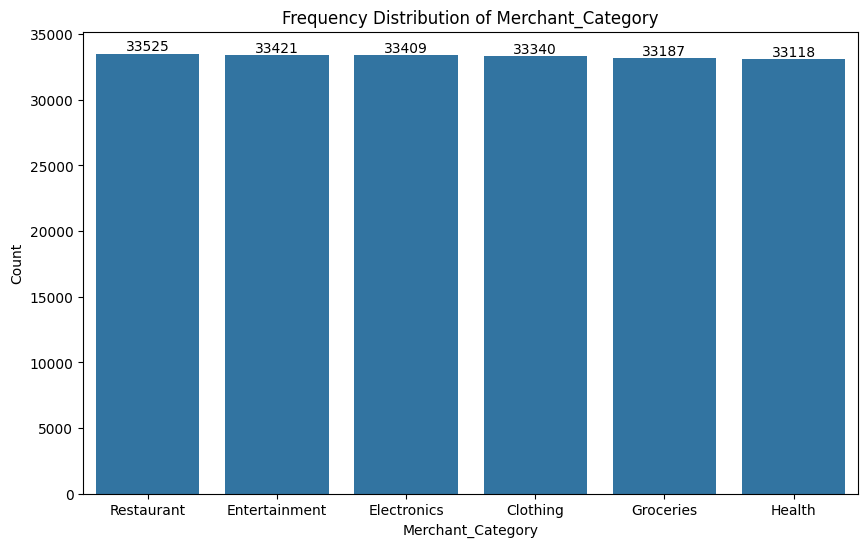

In [32]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Merchant_Category', order=df['Merchant_Category'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Frequency Distribution of Merchant_Category")
plt.xlabel("Merchant_Category")
plt.ylabel("Count")
plt.show()


##Account_Balance

In [33]:
df['Account_Balance'].describe()

,Account_Balance
count,200000.000000
mean,52437.988784
std,27399.507128
min,5000.820000
25%,28742.395000
50%,52372.555000
75%,76147.670000
max,99999.950000


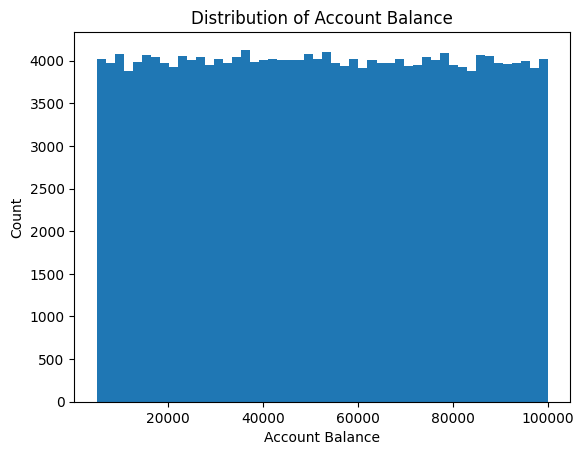

In [34]:
import matplotlib.pyplot as plt
plt.hist(df['Account_Balance'], bins=50)
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Account Balance')
plt.show()


##Transaction_Device

0
['Voice Assistant' 'POS Mobile Device' 'ATM' 'POS Mobile App'
 'Virtual Card' 'Mobile Device' 'Payment Gateway Device'
 'Debit/Credit Card' 'Bank Branch' 'Desktop/Laptop'
 'Self-service Banking Machine' 'ATM Booth Kiosk' 'Biometric Scanner'
 'Web Browser' 'Tablet' 'Wearable Device' 'QR Code Scanner' 'Smart Card'
 'POS Terminal' 'Banking Chatbot']


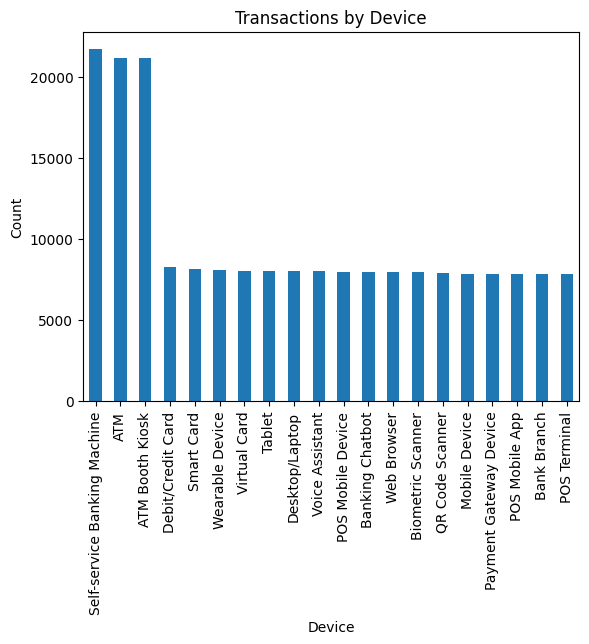

In [35]:
print(df['Transaction_Device'].isna().sum())
print(df['Transaction_Device'].unique())

df['Transaction_Device'].value_counts().plot(kind='bar')
plt.title('Transactions by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()

##Transaction_Location

0
['Thiruvananthapuram, Kerala' 'Nashik, Maharashtra' 'Bhagalpur, Bihar'
 'Chennai, Tamil Nadu' 'Amritsar, Punjab' 'Ahmedabad, Gujarat'
 'New Delhi, Delhi' 'Port Blair, Andaman and Nicobar Islands'
 'Bhopal, Madhya Pradesh' 'Jagdalpur, Chhattisgarh' 'Vadodara, Gujarat'
 'Chandigarh, Punjab' 'Champhai, Mizoram' 'Korba, Chhattisgarh'
 'Kolkata, West Bengal' 'Gaya, Bihar' 'Jorethang, Sikkim'
 'Silvassa, Dadra and Nagar Haveli and Daman and Diu'
 'Kanpur, Uttar Pradesh' 'Nagpur, Maharashtra' 'Bhubaneswar, Odisha'
 'Ambassa, Tripura' 'Jorhat, Assam'
 'Diglipur, Andaman and Nicobar Islands' 'Salem, Tamil Nadu'
 'Durg, Chhattisgarh' 'Churachandpur, Manipur' 'Kottayam, Kerala'
 'Varanasi, Uttar Pradesh' 'Imphal, Manipur' 'Belgaum, Karnataka'
 'Agra, Uttar Pradesh' 'Durgapur, West Bengal'
 'Daman, Dadra and Nagar Haveli and Daman and Diu'
 'Bilaspur, Chhattisgarh' 'Nellore, Andhra Pradesh' 'Patiala, Punjab'
 'Jabalpur, Madhya Pradesh' 'Mapusa, Goa' 'Agartala, Tripura'
 'Aurangabad, Maharashtra'

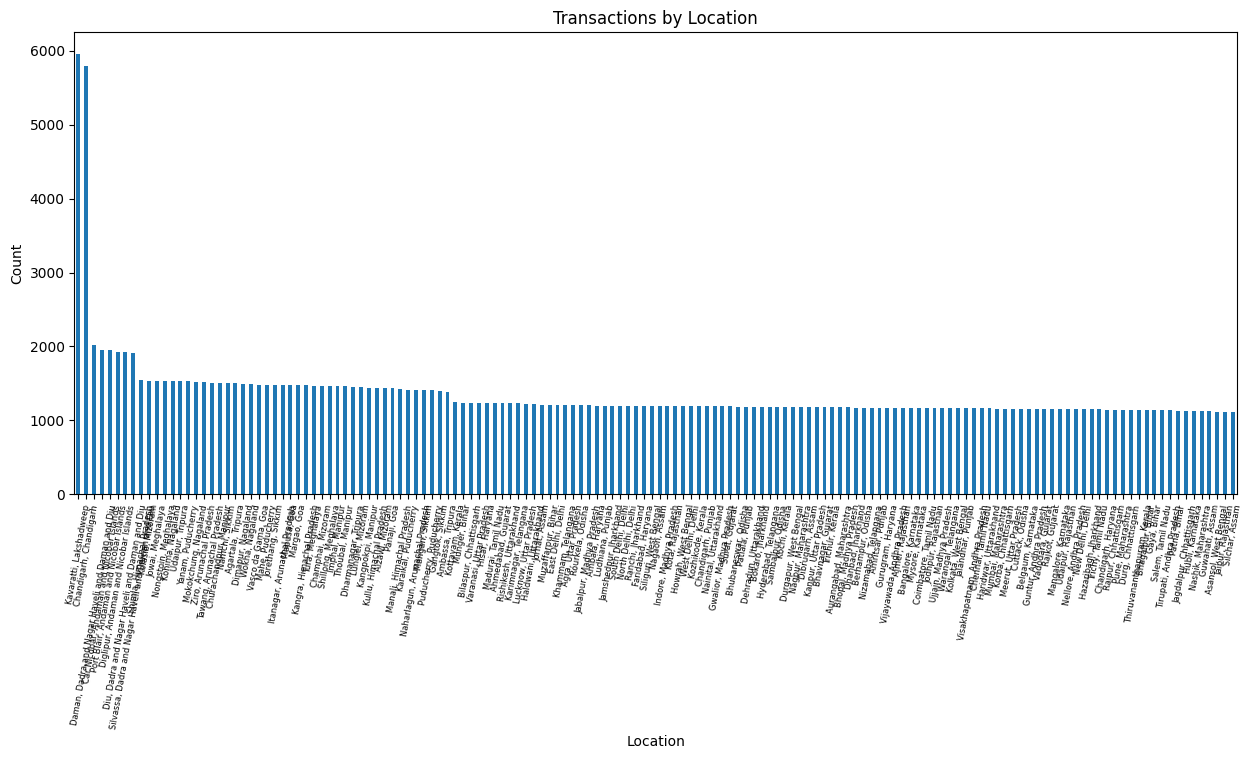

In [36]:
print(df['Transaction_Location'].isna().sum())
print(df['Transaction_Location'].unique())

plt.figure(figsize=(15,6))
df['Transaction_Location'].value_counts().plot(kind='bar')
plt.title('Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=80, fontsize=6)
plt.show()

##Device_Type

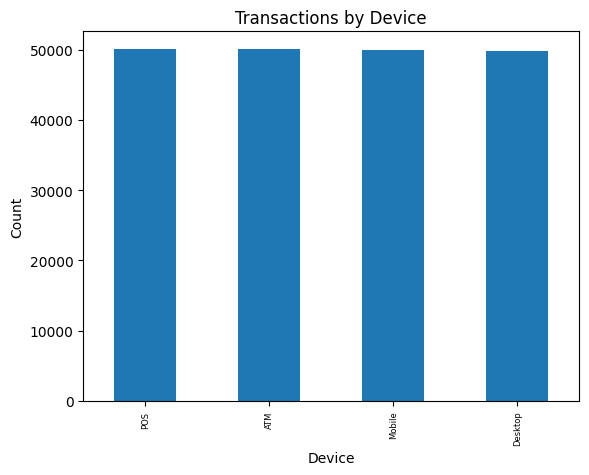

In [37]:
df['Device_Type'].value_counts().plot(kind='bar')
plt.title('Transactions by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(fontsize=6)
plt.show()

##Is_Fraud

/tmp/ipython-input-2869804338.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Fraud', data=df, palette='pastel')


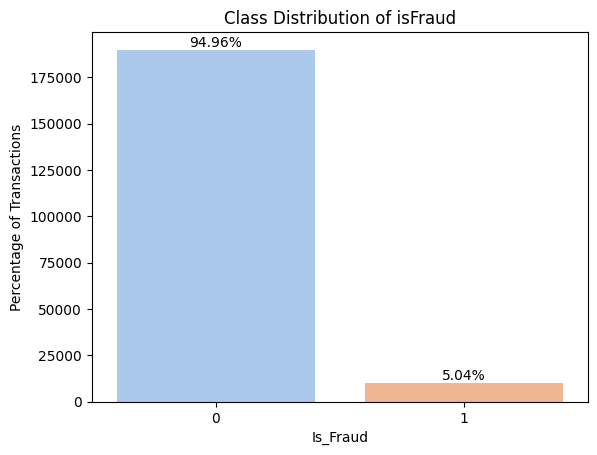

In [38]:
sns.countplot(x='Is_Fraud', data=df, palette='pastel')
plt.ylabel('Percentage of Transactions')

# Convert y-axis to percentage
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height, f'{height/total:.2%}',
             ha='center', va='bottom')

plt.title('Class Distribution of isFraud')
plt.show()

##Transaction_Currency

In [39]:
df['Transaction_Currency'].value_counts(normalize=True) * 100

,proportion
Transaction_Currency,
INR,100.0


##Customer_Contact

In [40]:
df['Customer_Contact'].value_counts(normalize=True) * 100

,proportion
Customer_Contact,
+9191471XXXXXX,0.0205
+9191943XXXXXX,0.0200
+9198593XXXXXX,0.0195
+9194008XXXXXX,0.0195
+9197078XXXXXX,0.0195
...,...
+9195181XXXXXX,0.0040
+9197026XXXXXX,0.0040
+9191927XXXXXX,0.0035


##Transaction_Description

Transaction_Description
Sports ticket                1268
Home appliance repair        1257
Taxi fare                    1248
Seminar registration         1246
Taxi booking                 1240
                             ... 
Food subscription            1098
Loyalty points redemption    1093
Penalty fee                  1092
Online subscription          1080
Medical treatment payment    1071
Name: count, Length: 172, dtype: int64


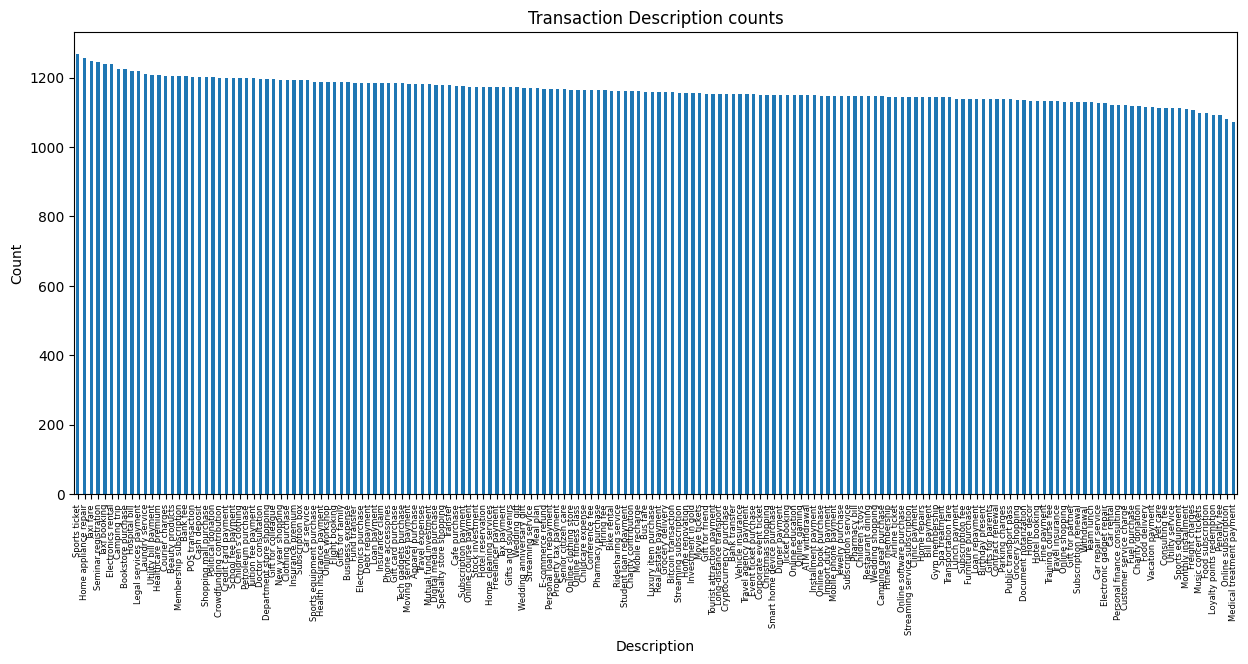

In [41]:
print(df['Transaction_Description'].value_counts())
plt.figure(figsize=(15,6))
df['Transaction_Description'].value_counts().plot(kind='bar')
plt.title('Transaction Description counts')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(fontsize=6)
plt.show()

##Customer_Email

In [42]:
df['Customer_Email'].value_counts()
email_customer_counts = df.groupby('Customer_Email')['Customer_ID'].nunique()
print(email_customer_counts)

Customer_Email
aachalXXX@XXXXX.com       55
aachalXXX@XXXXXX.com      40
aachalXXX@XXXXXXX.com     43
aachalXXXX@XXXXX.com      43
aachalXXXX@XXXXXX.com     31
                          ..
zinalXXXX@XXXXXX.com      44
zinalXXXX@XXXXXXX.com     35
zinalXXXXX@XXXXX.com      43
zinalXXXXX@XXXXXX.com     44
zinalXXXXX@XXXXXXX.com    35
Name: Customer_ID, Length: 4779, dtype: int64


# Bivariate Analysis

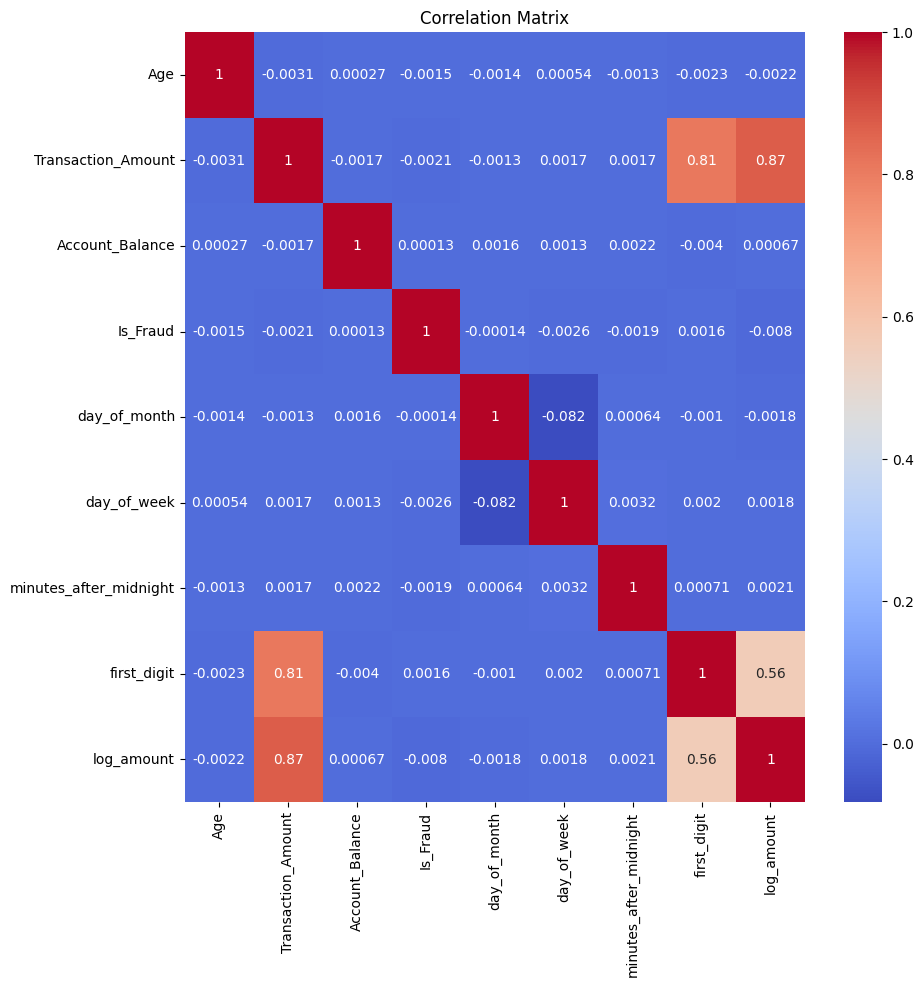

In [43]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [44]:
cat_variables = ['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_Type', 'Merchant_Category',
                 'Transaction_Device', 'Device_Type', 'Transaction_Description', 'Is_Fraud', 'Transaction_Location']
def entropy(x):
    _, counts = np.unique(x, return_counts=True)
    probabilities = counts / len(x)
    return -np.sum(probabilities * np.log2(probabilities))


def conditional_entropy(x, y):
    y_values, y_counts = np.unique(y, return_counts=True)
    y_probabilities = y_counts / len(y)

    conditional_entropies = []
    for y_val, y_prob in zip(y_values, y_probabilities):
        x_given_y = x[y == y_val]
        conditional_entropies.append(entropy(x_given_y))

    return np.sum(y_probabilities * conditional_entropies)

# Compute Entropy
entropies = pd.DataFrame([(x, entropy(df[x])) for x in cat_variables], columns=['cat1', 'H(cat1)'])

# Compute Conditional Entropy
results = []
for cat1 in cat_variables:
    for cat2 in cat_variables:
        if cat1 != cat2:
            results.append((cat1, cat2, conditional_entropy(df[cat1], df[cat2])))

conditional_entropy_df = pd.DataFrame(results, columns=['cat1', 'cat2', 'H(cat1|cat2)'])

information_gain = entropies.merge(conditional_entropy_df)
information_gain['information gain'] = information_gain['H(cat1)'] - information_gain['H(cat1|cat2)']

information_gain.head()

,cat1,H(cat1),cat2,H(cat1|cat2),information gain
0,Gender,0.999985,State,0.999855,0.000130
1,Gender,0.999985,City,0.999404,0.000581
2,Gender,0.999985,Bank_Branch,0.999404,0.000581
3,Gender,0.999985,Account_Type,0.999984,0.000001
4,Gender,0.999985,Transaction_Type,0.999962,0.000023


In [45]:
information_gain.pivot_table(values='information gain', index='cat1', columns='cat2', aggfunc=np.sum)

/tmp/ipython-input-3014882461.py:1: FutureWarning: The provided callable <function sum at 0x79ad0afdf880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  information_gain.pivot_table(values='information gain', index='cat1', columns='cat2', aggfunc=np.sum)


cat2,Account_Type,Bank_Branch,City,Device_Type,Gender,Is_Fraud,Merchant_Category,State,Transaction_Description,Transaction_Device,Transaction_Location,Transaction_Type
cat1,,,,,,,,,,,,
Account_Type,NaN,0.001016,0.001016,0.000027,1.201239e-06,1.375937e-05,0.000017,0.000206,0.001202,0.000143,0.001030,0.000024
Bank_Branch,0.001016,NaN,7.074427,0.001602,5.810214e-04,5.564681e-04,0.002544,5.027268,0.091783,0.009944,7.074427,0.001982
City,0.001016,7.074427,NaN,0.001602,5.810214e-04,5.564681e-04,0.002544,5.027268,0.091783,0.009944,7.074427,0.001982
Device_Type,0.000027,0.001602,0.001602,NaN,3.122235e-06,2.440582e-06,0.000044,0.000450,0.001908,0.000231,0.001647,0.000050
Gender,0.000001,0.000581,0.000581,0.000003,NaN,3.037422e-07,0.000015,0.000130,0.000568,0.000057,0.000585,0.000023
Is_Fraud,0.000014,0.000556,0.000556,0.000002,3.037422e-07,NaN,0.000025,0.000110,0.000544,0.000069,0.000564,0.000015
Merchant_Category,0.000017,0.002544,0.002544,0.000044,1.507825e-05,2.467149e-05,NaN,0.000541,0.003218,0.000414,0.002604,0.000078
State,0.000206,5.027268,5.027268,0.000450,1.297653e-04,1.098874e-04,0.000541,NaN,0.019868,0.002290,5.087364,0.000450
Transaction_Description,0.001202,0.091783,0.091783,0.001908,5.677839e-04,5.443325e-04,0.003218,0.019868,NaN,0.012267,0.093735,0.002420


/tmp/ipython-input-3196855480.py:3: FutureWarning: The provided callable <function sum at 0x79ad0afdf880> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2),


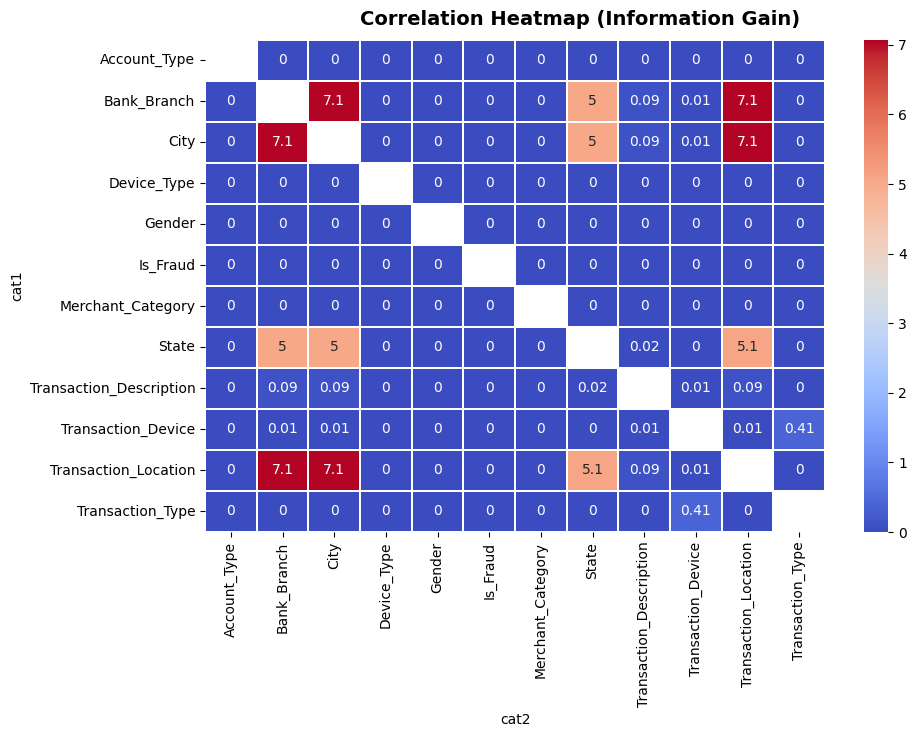

In [46]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2),
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True,
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap (Information Gain)', fontsize=14, fontweight='bold')